<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 - Problem 1.2**

CSC 732 Pattern Recognition and Neural Networks

Instructor: Prof. Natacha Gueorguieva

Contributors: Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

Date: February 26, 2024

Part 1.2 : Use matplotlib for plotting or seaborn
Pairwise Pearson Correlation, Skew for Each Attribute, Univariate Density Plot, Correlation Matrix Plot


Import Libraries

In [15]:
# CSC 732 Hw1 - 1.2
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei
# HW1 Part 1.2: Use matplotlib for plotting or seaborn.
# Listing 4: Pairwise Pearson Correlation, Skew for Each Attribute, Univariate from pandas import read_csv

# Load Basic Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
import matplotlib.pyplot as plt
import numpy as np
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.preprocessing import Normalizer



Import and explorer dataset

read_csv() pandas function

In [16]:
# Loading data and getting some info about data such as data type and dimensions
filename = '/content/BankNote_Authentication.csv'
# names = ['variance','skewness','curtosis', 'entropy', 'class']
dataset = read_csv(filename, delimiter=',')



Pairwise Pearson Correlation

In [17]:
# Pairwise pearson correlation
set_option('display.width',100)
set_option('display.precision',3)
correlations=dataset.corr(method='pearson')
print("Pearson Pearson Correlation:")
print(correlations)
print()



Pearson Pearson Correlation:
          variance  skewness  curtosis  entropy  class
variance     1.000     0.264    -0.381    0.277 -0.725
skewness     0.264     1.000    -0.787   -0.526 -0.445
curtosis    -0.381    -0.787     1.000    0.319  0.156
entropy      0.277    -0.526     0.319    1.000 -0.023
class       -0.725    -0.445     0.156   -0.023  1.000



**Pairwise pearson correlation analysis:**
We can see in the results the correlation between each attribute with all the other attributes. For example, variance and variance have a correlation of 1 because they are the same attribute. The same is true for all other attributes with themselves. We can also see if a correlation between attributes is positive like skewness and variance (0.264) and entropy (0.277) or negative like curtosis (-0.381) and class (-0.725). This chart is very useful to see how attributes correlate with one another and if they have a strong or weak correlation as well as positive or negative correlation.

Skew for Each Attribute

In [18]:
# Skew for Each Attribute,
skew = dataset.skew()
print("Skew for Each Attribute:")
print(skew)
print()



Skew for Each Attribute:
variance   -0.149
skewness   -0.394
curtosis    1.089
entropy    -1.022
class       0.223
dtype: float64



**Skew Analysis:** Skew refers to a distribution that is shifted one way or another. This part gives a skew value for every attribute in the dataset. For example, the attribute variance has a negative skew of -0.149. The attribute curtosis has a positive skew of 1.089, and so on. We can use these values to possibly correct the skew so our models are more accurate.

Univariate Density Plot

Univariate Density Plot:


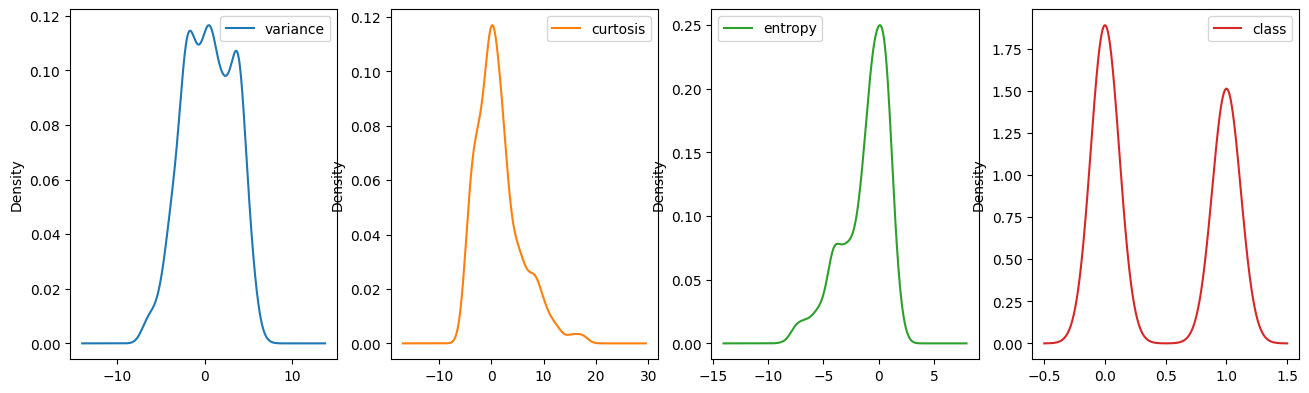

In [19]:
# Univariate Density Plot
dataset=dataset.drop(labels='skewness',axis=1)
dataset.plot(kind='density', subplots=True, layout=(2,5), sharex=False, figsize=(20,10))
print("Univariate Density Plot:")
plt.show()
print()



**Density plots** are another way of getting a quick idea of the distribution of each attribute. All the attributes variance-class have the density plot above. Histograms also work, but density plots allow us to see the distribution more clearly and can be useful.

Correlation Matrix Plot

Correlation Matrix Plot:


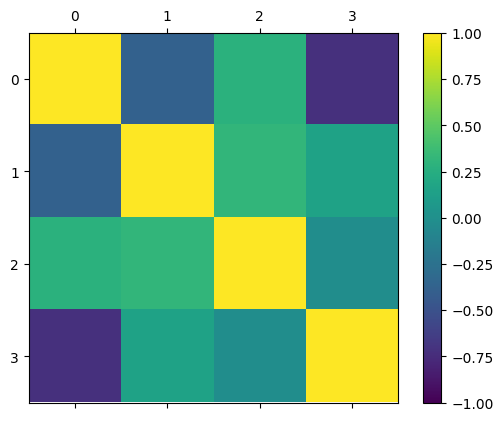

In [20]:
# Correlation Matrix Plot
correlations=dataset.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
print("Correlation Matrix Plot:")
plt.show()
print()



**Correlation Matric Analysis:** Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. In our plot, we can see each attribute has a correlation value of 1 with itself. Then entropy and variance for example is light green which is the value of about 0.5 so it is positively correlated. On the other hand, class and variance is a purplish color, and we can see this is a negative correlation. This plot makes it easy to visualize the correlations between attributes.

Rescale Data

In [21]:
# Rescale Data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array=dataset.values
X=array[:,0:5]
Y=array[:,2]
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
set_printoptions(precision=3)
print("Rescale Data:")
print(rescaledX[0:1,:])
print()



Rescale Data:
[[0.769 0.107 0.737 0.   ]]



**Rescale Data Analysis:** When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes so that all have the same scale. In our case, I used MinMaxScaler to rescale our data. We can see the results. For example, variance becomes 1, curtosis becomes 0 and so on. All values are between 0 and 1, inclusive.

Standardize Data

In [22]:
# Standardize Data
from sklearn.preprocessing import StandardScaler
array=dataset.values
X=array[:,0:5]
Y=array[:,2]
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
set_printoptions(precision=3)
print("Standardize Data:")
print(rescaledX[0:1,:])
print()



Standardize Data:
[[ 1.122 -0.976  0.355 -0.895]]



**Standardize data analysis:** Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. In our case we used StandardScaler to standerdize our data. For example, variance was standerdized to 1, curtosis was standerdized to 0, and so on. All values are between 0 and 1.

Normalize Data

In [23]:
# Normalize Data
array=dataset.values
X=array[:,0:5]
Y=array[:,2]
scaler=Normalizer().fit(X)
normalizedX=scaler.transform(X)
set_printoptions(precision=3)
print("Normalize Data:")
print(normalizedX[0:1,:])
print()



Normalize Data:
[[ 0.787 -0.61  -0.097  0.   ]]



**Normalize Data Analysis:** Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). In our case, we used Normalizer to normalize our data. For example, variance was normalized to 0.787 and so on .The values are between -1 and 1.

Binarize Data

In [24]:
# Binarize Data:
array=dataset.values
X=array[:,0:5]
Y=array[:,2]
binarizer=Binarizer(threshold=0.0).fit(X)
binaryX=binarizer.transform(X)
set_printoptions(precision=3)
print("Binarize Data:")
print(binaryX[0:1,:])
print()

Binarize Data:
[[1. 0. 0. 0.]]



**Binarize Data Analysis:** You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. The threshold we chose for our data was 0. Nothing below 0 gets assigned 0 and anything above 0 gets assigned 1. For example, variance became 1 and so on. This can be useful when you have probabilities that you want to make crisp values.